# Project - Web Scrapping & Data Preparation of News Articles Using KMeans Clustering

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Scraped data from Opindia News Website

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://www.opindia.com/latest-news/"
data = requests.get(url)

In [3]:
data

<Response [200]>

In [4]:
soup = BeautifulSoup(data.content,"html.parser")

### Created function for fetching article with URL

In [5]:
def fetch_article(url):
    data = requests.get(url)
    soup = BeautifulSoup(data.content,"html.parser")
    articles = []
    for i in soup.find_all("h3",class_ = ["entry-title td-module-title"]):
        articles.append(i.find('a')['title'])     
    return articles

### Created URL list

In [6]:
urllist = []
for i in range(2,21,1):
    url = "https://www.opindia.com/latest-news/page/" + str(i) + "/"
    urllist.append(url)

### By fetch articles function fetched the data

In [7]:
all_articles = []
for i in urllist:
    all_articles.extend(fetch_article(i))

In [8]:
all_articles[1:200]

['US President Joe Biden invited as chief guest for the Republic Day celebrations: US envoy to India',
 'Madhya Pradesh: Several BJP leaders including former MP Bodh Singh Bhagat join Congress ahead of assembly polls',
 'Back in 2010, ex-PM Manmohan Singh had told Canada to rein in Khalistanis, then also it was G20. Read how Canada has failed on this count',
 'BJP MP Nishikant Dubey slams Sonia Gandhi’s demands over Women’s Reservation bill, reminds her of Constitutional measures and legalities',
 'Revisiting the brutal legacy of the Nizam rule in Hyderabad before Sardar Patel changed things',
 'G-20 summit in Delhi: Bharat and bharatiyata stole the spotlight at the gala event',
 'Oil and Islam: What made Saudi Arabia course correct to become ‘moderate’, and why ‘old school’ Islamists in Indian subcontinent are upset with Crown Prince MBS',
 '‘Your God is false, convert’: Debate over hatred and forced conversions after viral video from Israel shows Jewish children confronting 2 Christi

## Tokenization and Stemming

In [9]:
p_art=[]
for i in all_articles:
    q=i.upper()
    import re
    q=re.sub('[^A-Z0-9 ]','',q)
    from nltk.stem import PorterStemmer
    tk_q=q.split(" ")
    sent=""
    for j in tk_q:
        ps=PorterStemmer()
        sent=sent+" "+ps.stem(j).upper()
    p_art.append(sent)
    

In [10]:
p_art[1:200]

[' US PRESID JOE BIDEN INVIT AS CHIEF GUEST FOR THE REPUBL DAY CELEBR US ENVOY TO INDIA',
 ' MADHYA PRADESH SEVER BJP LEADER INCLUD FORMER MP BODH SINGH BHAGAT JOIN CONGRESS AHEAD OF ASSEMBL POLL',
 ' BACK IN 2010 EXPM MANMOHAN SINGH HAD TOLD CANADA TO REIN IN KHALISTANI THEN ALSO IT WA G20 READ HOW CANADA HA FAIL ON THI COUNT',
 ' BJP MP NISHIK DUBEY SLAM SONIA GANDHI DEMAND OVER WOMEN RESERV BILL REMIND HER OF CONSTITUT MEASUR AND LEGAL',
 ' REVISIT THE BRUTAL LEGACI OF THE NIZAM RULE IN HYDERABAD BEFOR SARDAR PATEL CHANG THING',
 ' G20 SUMMIT IN DELHI BHARAT AND BHARATIYATA STOLE THE SPOTLIGHT AT THE GALA EVENT',
 ' OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CORRECT TO BECOM MODER AND WHI OLD SCHOOL ISLAMIST IN INDIAN SUBCONTIN ARE UPSET WITH CROWN PRINC MB',
 ' YOUR GOD IS FALS CONVERT DEBAT OVER HATR AND FORC CONVERS AFTER VIRAL VIDEO FROM ISRAEL SHOW JEWISH CHILDREN CONFRONT 2 CHRISTIAN MISSIONARI',
 ' NASIRJUNAID MURDER CASE AND NUH VIOLENC IS MONU MANESAR BE MADE A SCAPEGOAT TO

### TF-IDF Vectorizer 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
A=tf.fit_transform(p_art).toarray()
A[1:200]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Elbow Method

In [12]:
from sklearn.cluster import KMeans
wcss=[]
k= range(1,20,1)
for i in k:
    km=KMeans(n_clusters=i) 
    model=km.fit(A)
    wcss.append(model.inertia_)
    

### Visualize Elbow Curve

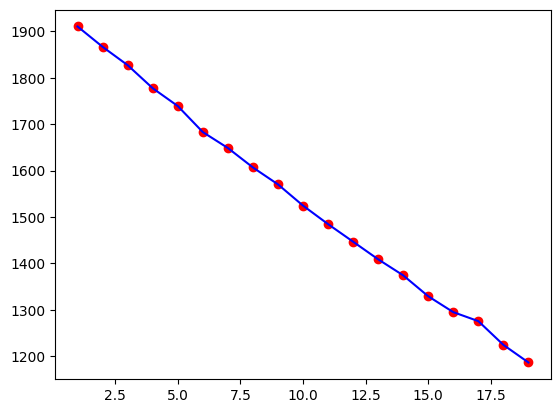

In [13]:
import matplotlib.pyplot as plt
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='blue')

## K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
clusters_=km.fit(A)

In [15]:
clusters_.labels_

array([4, 2, 4, ..., 2, 2, 2])

### Created DataFrame with cluster_labels and articles

In [16]:
Q1=pd.DataFrame(p_art,columns=['Articles'])
Q1['Clusters']=clusters_.labels_
Q1.head(20)

,Articles,Clusters
0,LOK SABHA PASS THE WOMEN RESERV BILL WITH 454...,4
1,US PRESID JOE BIDEN INVIT AS CHIEF GUEST FOR ...,2
2,MADHYA PRADESH SEVER BJP LEADER INCLUD FORMER...,4
3,BACK IN 2010 EXPM MANMOHAN SINGH HAD TOLD CAN...,2
4,BJP MP NISHIK DUBEY SLAM SONIA GANDHI DEMAND ...,4
5,REVISIT THE BRUTAL LEGACI OF THE NIZAM RULE I...,1
6,G20 SUMMIT IN DELHI BHARAT AND BHARATIYATA ST...,3
7,OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...,0
8,YOUR GOD IS FALS CONVERT DEBAT OVER HATR AND ...,3
9,NASIRJUNAID MURDER CASE AND NUH VIOLENC IS MO...,0


### Creating Dictionary

In [17]:
E={0:'Cluster 1',
    1:'Cluster 2',
    2:'Cluster 3',
    3:'Cluster 4',
    4 :'Cluster 5'}

### Cluster Names to Clusters

In [18]:
R=[]
for i in Q1.Clusters:
    R.append(E[i])
Q1['Category']=R

In [19]:
Q1.head(20)

,Articles,Clusters,Category
0,LOK SABHA PASS THE WOMEN RESERV BILL WITH 454...,4,Cluster 5
1,US PRESID JOE BIDEN INVIT AS CHIEF GUEST FOR ...,2,Cluster 3
2,MADHYA PRADESH SEVER BJP LEADER INCLUD FORMER...,4,Cluster 5
3,BACK IN 2010 EXPM MANMOHAN SINGH HAD TOLD CAN...,2,Cluster 3
4,BJP MP NISHIK DUBEY SLAM SONIA GANDHI DEMAND ...,4,Cluster 5
5,REVISIT THE BRUTAL LEGACI OF THE NIZAM RULE I...,1,Cluster 2
6,G20 SUMMIT IN DELHI BHARAT AND BHARATIYATA ST...,3,Cluster 4
7,OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...,0,Cluster 1
8,YOUR GOD IS FALS CONVERT DEBAT OVER HATR AND ...,3,Cluster 4
9,NASIRJUNAID MURDER CASE AND NUH VIOLENC IS MO...,0,Cluster 1


In [20]:
cluster1=Q1[Q1.Category=='Cluster 1'].Articles
cluster1

7        OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...
9        NASIRJUNAID MURDER CASE AND NUH VIOLENC IS MO...
25       OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...
26       AYODHYA PASTOR PRESSURIS INDIAN ARMI SOLDIER ...
34       OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...
                              ...                        
1898     AYODHYA PASTOR PRESSURIS INDIAN ARMI SOLDIER ...
1906     OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...
1908     NASIRJUNAID MURDER CASE AND NUH VIOLENC IS MO...
1924     OIL AND ISLAM WHAT MADE SAUDI ARABIA COURS CO...
1925     AYODHYA PASTOR PRESSURIS INDIAN ARMI SOLDIER ...
Name: Articles, Length: 155, dtype: object